In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import initializers
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import ResNet101, InceptionV3, EfficientNetB1
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Flatten, Dense, GlobalAveragePooling2D


import pandas as pd
import numpy as np
import os
import time
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/gdrive',force_remount=True)
!unzip -o -qq '/gdrive/MyDrive/fruits-360.zip'

Mounted at /gdrive


# Problem 1.

In [3]:
train_data_dir = '/content/fruits-360_dataset/fruits-360/Training'
test_data_dir = '/content/fruits-360_dataset/fruits-360/Test'

IMG_SIZE = (75,75)
BATCH_SIZE = 1000

train_dataset, val_dataset = image_dataset_from_directory(train_data_dir,
                                             label_mode = 'categorical',
                                             shuffle = True,
                                             seed = 42,
                                             validation_split = 0.15,
                                             batch_size = BATCH_SIZE,
                                             image_size = IMG_SIZE,
                                             subset = 'both')

test_dataset = image_dataset_from_directory(test_data_dir,
                                            label_mode = 'categorical',
                                            shuffle = True,
                                            seed = 42,
                                            batch_size = BATCH_SIZE,
                                            image_size = IMG_SIZE)

Found 67692 files belonging to 131 classes.
Using 57539 files for training.
Using 10153 files for validation.
Found 22688 files belonging to 131 classes.


In [4]:
def get_transfer_model(model_class, num_class = 131):

  base_model = model_class(input_shape = (75,75,3), weights = 'imagenet', include_top = False)

  for layer in base_model.layers:
    layer.trainable = False

  x = base_model.output
  x = Flatten()(x)
  pred = Dense(num_class,
               activation = 'softmax',
               bias_initializer = 'zeros',
               kernel_initializer=tf.keras.initializers.GlorotUniform(seed=99))(x)
  model = Model(inputs = base_model.input, outputs = pred)
  model.compile(optimizer=Adam(), loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

  return model

In [5]:
model_resnet = get_transfer_model(ResNet101, num_class = 131)
model_inception = get_transfer_model(InceptionV3, num_class = 131)
model_eff_net = get_transfer_model(EfficientNetB1, num_class = 131)

27018416/27018416 [==============================] - 0s 0us/step


In [6]:
model_resnet.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 75, 75, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 81, 81, 3)            0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 38, 38, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 38, 38, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [7]:
model_inception.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 75, 75, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 37, 37, 32)           864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 37, 37, 32)           96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 37, 37, 32)           0         ['batch_normalization[0]

In [8]:
model_eff_net.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 75, 75, 3)]          0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 75, 75, 3)            0         ['input_3[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 75, 75, 3)            7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 75, 75, 3)            0         ['normalization[0][0]'] 

In [9]:
time_resnet_start = time.time()
history_resnet = model_resnet.fit(train_dataset, epochs = 5, validation_data=val_dataset)
time_resnet_end = time.time()
print(time_resnet_end - time_resnet_start)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5577: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


58/58 [==============================] - 78s 970ms/step - loss: 1.1789 - accuracy: 0.8714 - val_loss: 0.0126 - val_accuracy: 0.9972
Epoch 2/5
58/58 [==============================] - 54s 904ms/step - loss: 0.0025 - accuracy: 0.9993 - val_loss: 0.0053 - val_accuracy: 0.9994
Epoch 3/5
58/58 [==============================] - 55s 896ms/step - loss: 4.3990e-04 - accuracy: 0.9999 - val_loss: 0.0046 - val_accuracy: 0.9995
Epoch 4/5
58/58 [==============================] - 57s 953ms/step - loss: 1.9527e-04 - accuracy: 1.0000 - val_loss: 0.0043 - val_accuracy: 0.9995
Epoch 5/5
58/58 [==============================] - 56s 935ms/step - loss: 1.5424e-04 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 0.9995
327.14279961586


In [10]:
time_inception_start = time.time()
history_inception = model_inception.fit(train_dataset, epochs = 5, validation_data=val_dataset)
time_inception_end = time.time()
print(time_inception_end - time_inception_start)

Epoch 1/5
58/58 [==============================] - 38s 425ms/step - loss: 26.8544 - accuracy: 0.3753 - val_loss: 4.6508 - val_accuracy: 0.6730
Epoch 2/5
58/58 [==============================] - 19s 307ms/step - loss: 2.5187 - accuracy: 0.7762 - val_loss: 1.6525 - val_accuracy: 0.8235
Epoch 3/5
58/58 [==============================] - 21s 303ms/step - loss: 0.9962 - accuracy: 0.8753 - val_loss: 0.8449 - val_accuracy: 0.8796
Epoch 4/5
58/58 [==============================] - 19s 308ms/step - loss: 0.5321 - accuracy: 0.9198 - val_loss: 0.4087 - val_accuracy: 0.9378
Epoch 5/5
58/58 [==============================] - 21s 341ms/step - loss: 0.3123 - accuracy: 0.9470 - val_loss: 0.4572 - val_accuracy: 0.9320
140.0118203163147


In [11]:
time_eff_net_start = time.time()
history_eff_net = model_eff_net.fit(train_dataset, epochs = 5, validation_data=val_dataset)
time_eff_net_end = time.time()
print(time_eff_net_end - time_eff_net_start)

Epoch 1/5
58/58 [==============================] - 46s 566ms/step - loss: 0.5533 - accuracy: 0.8825 - val_loss: 0.0390 - val_accuracy: 0.9965
Epoch 2/5
58/58 [==============================] - 27s 425ms/step - loss: 0.0462 - accuracy: 0.9940 - val_loss: 0.0166 - val_accuracy: 0.9993
Epoch 3/5
58/58 [==============================] - 28s 420ms/step - loss: 0.0259 - accuracy: 0.9976 - val_loss: 0.0105 - val_accuracy: 0.9998
Epoch 4/5
58/58 [==============================] - 28s 422ms/step - loss: 0.0173 - accuracy: 0.9987 - val_loss: 0.0071 - val_accuracy: 0.9998
Epoch 5/5
58/58 [==============================] - 28s 445ms/step - loss: 0.0131 - accuracy: 0.9989 - val_loss: 0.0053 - val_accuracy: 0.9999
173.98042368888855


## Loss Function Plot

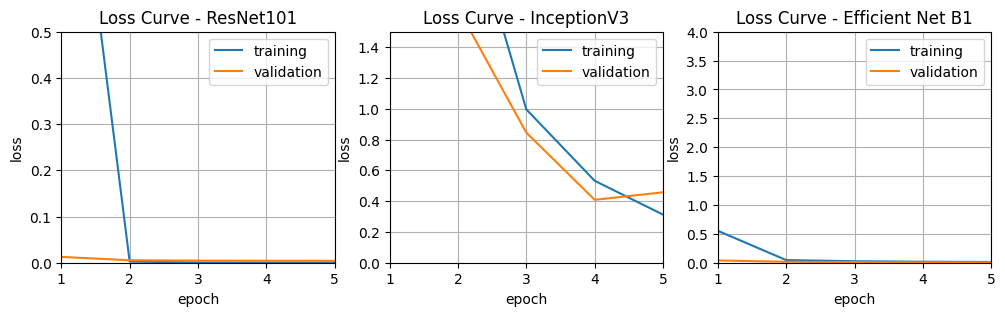

In [22]:
fig, [ax1,ax2,ax3] = plt.subplots(1,3,figsize=(12,3))

ax1.plot([1,2,3,4,5],history_resnet.history['loss'], label='training')
ax1.plot([1,2,3,4,5], history_resnet.history['val_loss'], label='validation')

ax1.set_ylim([0, 0.5])
ax1.set_xlim([1, 5])
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.legend()
ax1.set_title('Loss Curve - ResNet101')
ax1.grid(True)


ax2.plot([1,2,3,4,5],history_inception.history['loss'], label='training')
ax2.plot([1,2,3,4,5],history_inception.history['val_loss'], label='validation')
ax2.set_ylim([0, 1.5])
ax2.set_xlim([1, 5])
ax2.set_xlabel('epoch')
ax2.set_ylabel('loss')
ax2.legend()
ax2.set_title('Loss Curve - InceptionV3')
ax2.grid(True)


ax3.plot([1,2,3,4,5],history_eff_net.history['loss'], label='training')
ax3.plot([1,2,3,4,5],history_eff_net.history['val_loss'], label='validation')
ax3.set_ylim([0, 4])
ax3.set_xlim([1, 5])
ax3.set_xlabel('epoch')
ax3.set_ylabel('loss')
ax3.legend()
ax3.set_title('Loss Curve - Efficient Net B1')
ax3.grid(True)

In [24]:
pred_resnet = model_resnet.predict(test_dataset)
pred_inception = model_inception.predict(test_dataset)
pred_eff_net = model_eff_net.predict(test_dataset)

23/23 [==============================] - 16s 586ms/step


## Results Table

| Model | Model size | Inference time | Testing Accuracy|
|----------|----------|----------|----------|
| Efficient Net B1 | 8,084,490 | 31s (5 epochs) | 0.9998 |
| Inception V3 | 22,071,203 | 13s (5 epochs) | 0.9321 |
| ResNet 101 | 45,072,899 | 16s (5 epochs) | 0.9995 |


# Problem 2
### Joy Li (jl3724) helped me out on problem 2.

In [ ]:
pip install datasets

In [2]:
pip install transformers

In [3]:
from datasets import load_dataset
raw_data = load_dataset("imdb")

train_data = raw_data["train"].shuffle(seed=99)
train_data = train_data.select(range(1000, 25000))
val_data = train_data.select(range(1000))
test_data = raw_data["test"]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [4]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("albert-base-v2")

def get_token(examples):
    return tokenizer(examples['text'], truncation=True, padding='max_length',max_length=256)

In [5]:
train_dataset = train_data.map(get_token, batched=True)
val_dataset = val_data.map(get_token, batched=True)
test_dataset = test_data.map(get_token, batched=True)

train_dataset.set_format(type='tensorflow', columns=['input_ids', 'attention_mask', 'label'])
val_dataset.set_format(type='tensorflow', columns=['input_ids', 'attention_mask', 'label'])
test_dataset.set_format(type='tensorflow', columns=['input_ids', 'attention_mask', 'label'])

Map:   0%|          | 0/24000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

In [6]:
from transformers import TFAlbertForSequenceClassification
model = TFAlbertForSequenceClassification.from_pretrained("albert-base-v2")

All PyTorch model weights were used when initializing TFAlbertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFAlbertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [9]:

def convert_to_tf_format(dataset):
    features = {x: dataset[x] for x in ['input_ids', 'attention_mask']}
    tf_dataset = tf.data.Dataset.from_tensor_slices((features, dataset["label"]))
    return tf_dataset

train_tf_dataset = convert_to_tf_format(train_dataset).shuffle(len(train_dataset)).batch(16)
val_tf_dataset = convert_to_tf_format(val_dataset).batch(16)
test_tf_dataset = convert_to_tf_format(test_dataset).batch(16)

In [10]:
# Define optimizer and loss
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5, epsilon=1e-08, clipnorm=1.0)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

# Train the model
history = model.fit(train_tf_dataset, validation_data=val_tf_dataset, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 1304s 852ms/step - loss: 0.2789 - accuracy: 0.8947 - val_loss: 0.2082 - val_accuracy: 0.9230
Epoch 2/5
1500/1500 [==============================] - 1272s 848ms/step - loss: 0.1969 - accuracy: 0.9322 - val_loss: 0.1279 - val_accuracy: 0.9610
Epoch 3/5
1500/1500 [==============================] - 1271s 847ms/step - loss: 0.1477 - accuracy: 0.9561 - val_loss: 0.1092 - val_accuracy: 0.9720
Epoch 4/5
1500/1500 [==============================] - 1274s 849ms/step - loss: 0.1072 - accuracy: 0.9722 - val_loss: 0.1067 - val_accuracy: 0.9730
Epoch 5/5
1500/1500 [==============================] - 1273s 849ms/step - loss: 0.0815 - accuracy: 0.9811 - val_loss: 0.0660 - val_accuracy: 0.9830


## Loss Curve

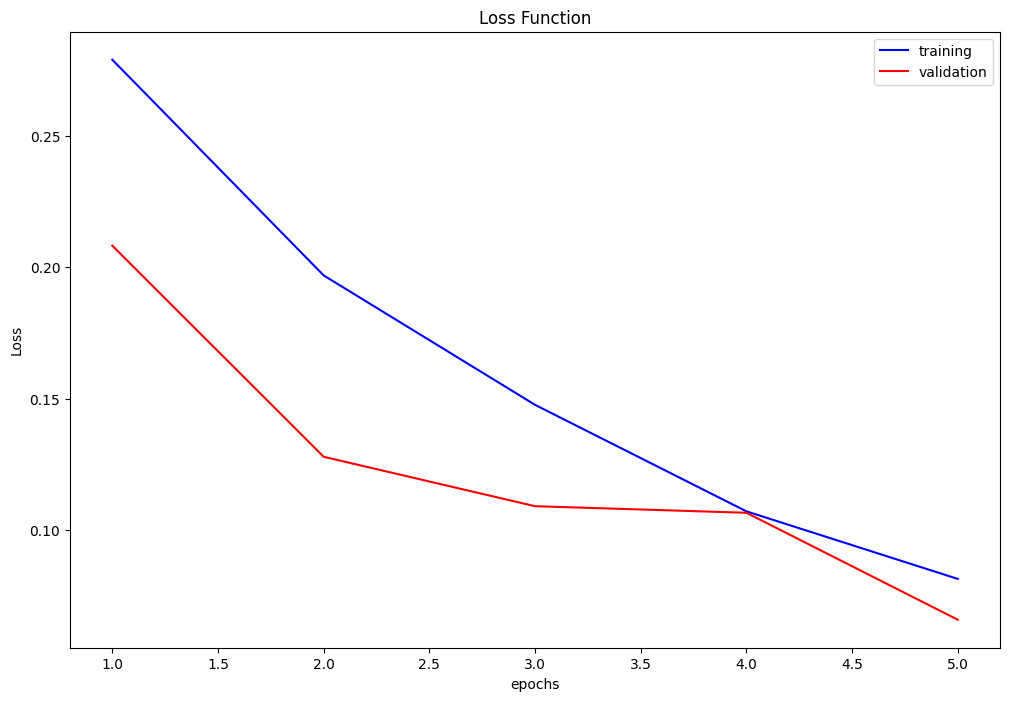

In [12]:
import pandas as pd
import numpy as np
import os
import time
import matplotlib.pyplot as plt
# Plotting the training and validation loss
plt.figure(figsize=(12, 8))
plt.plot([1,2,3,4,5],history.history['loss'], 'b', label='training')
plt.plot([1,2,3,4,5],history.history['val_loss'], 'r', label='validation')
plt.title('Loss Function')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Analysis of the model
- Overfit or underfit: not sure; both training loss and validation loss curves are steadily decreasing. Maybe this is because I didn't have enough epochs. I only used 5 epochs. If validation loss is increasing after epoch = 5, then it will be overfitting.
- Compare to the model from HW2: I didn't do HW2, but I am guessing model from HW 3 improves training and validation accuracies as model 3 applies transfer learning. In other words, model leverages the knowledge from previously trained model, which is faster to train and more accurate to train.
- According to the training and validation loss curve, it seems to be too good to be true. Both of them are decreasing steady, which implies the model is doing a good job.

